In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/facial-age-estimation/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1bvtrfzyZHNtEdmd4PS68jmpGT2RO5sOZ/facial-age-estimation


In [2]:
ls

data/  README.txt  requirements.txt  src/  weights/


In [3]:
import os
import glob
import re
from PIL import Image
import torchvision.transforms as T
import torch
from sklearn.metrics import mean_absolute_error
from src.models.base_model import AgeEstimationModel
from src.models.base_model import LegacyAgeEstimationModel
from src.config import config

from src.evaluation.evaluate_base import evaluate_model, get_data_loaders, print_results, plot_metric_comparison, plot_age_group_mae
from torch.utils.data import Dataset, DataLoader, TensorDataset


📊 모델 성능 비교
Metric     |   Base Model | Finetuned Model
---------------------------------------------
MAE        |         9.99 |            8.59
RMSE       |        12.40 |           11.25
R²         |         0.29 |            0.42


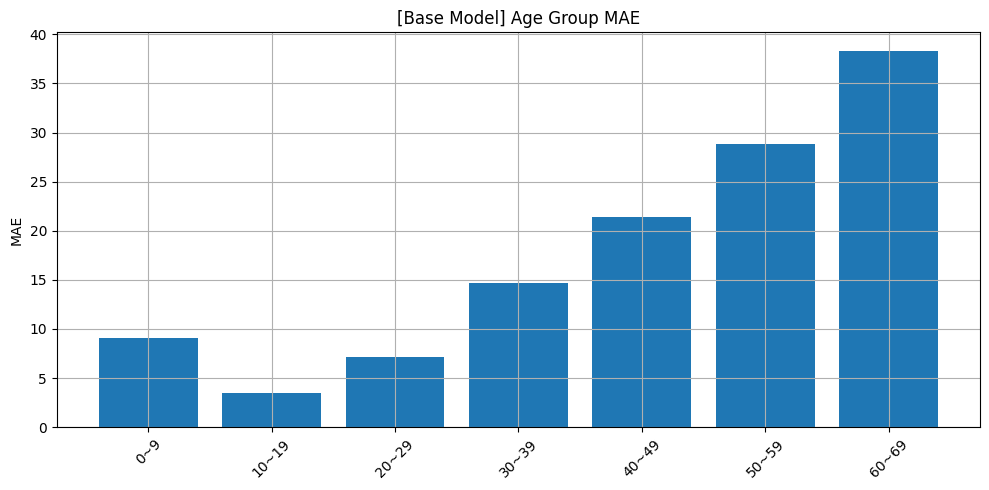

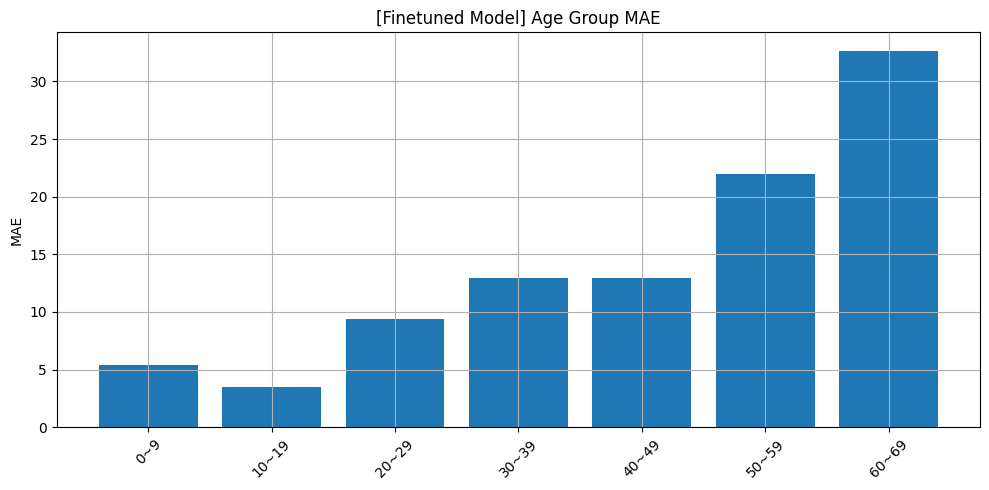

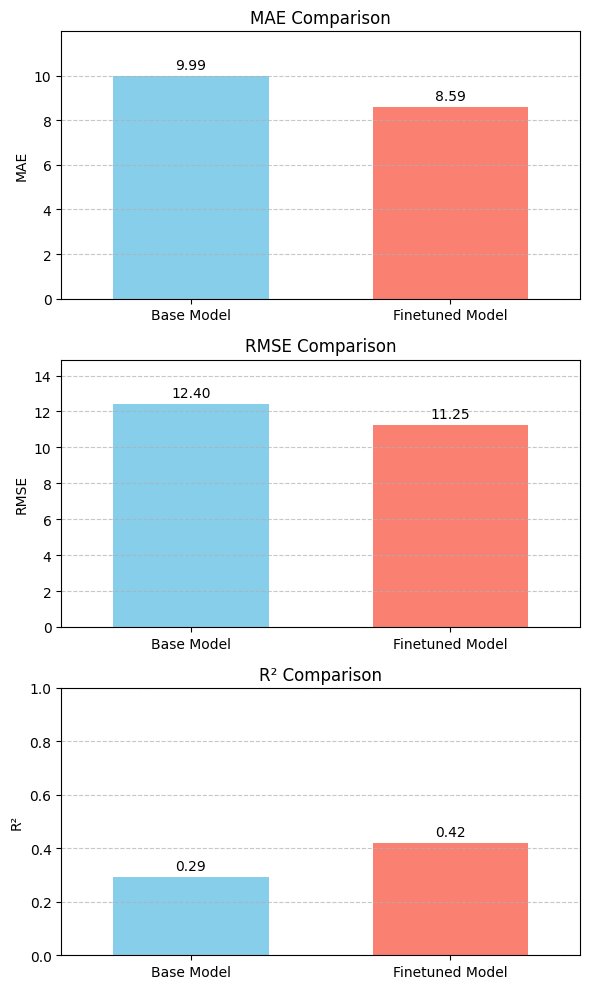

In [4]:
# 모델 로딩 (기존 코드 동일)
path = "./src/weights"
korean_checkpoint = os.path.join(path, 'pretrained_weight_korean.pt')
legacy_checkpoint = os.path.join(path, 'legacy_weight.pt')

korean_model = AgeEstimationModel(
    input_dim=3, output_nodes=1,
    model_name=config['model_name'],
    pretrain_weights='IMAGENET1K_V2'
).to(config['device'])

legacy_model = LegacyAgeEstimationModel(
    input_dim=3, output_nodes=1,
    model_name=config['model_name'],
    pretrain_weights='IMAGENET1K_V2'
).to(config['device'])

korean_model.load_state_dict(torch.load(korean_checkpoint))
legacy_model.load_state_dict(torch.load(legacy_checkpoint))

# 테스트 및 결과 시각화
test_loader = get_data_loaders()

# 모델 평가 (추가 반환값 처리)
l_mae, l_rmse, l_r2, l_preds, l_targets = evaluate_model(legacy_model, test_loader)
k_mae, k_rmse, k_r2, k_preds, k_targets = evaluate_model(korean_model, test_loader)

# 결과 출력
print_results((l_mae, l_rmse, l_r2), (k_mae, k_rmse, k_r2))

# 연령대별 MAE 시각화 추가
plot_age_group_mae(l_targets, l_preds, title="[Base Model] Age Group MAE")
plot_age_group_mae(k_targets, k_preds, title="[Finetuned Model] Age Group MAE")

# 메트릭 비교 플롯
plot_metric_comparison((l_mae, l_rmse, l_r2), (k_mae, k_rmse, k_r2))